# CSE 802 Project: Genre recognition using FMA
Kevin McMahon

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tracks = pd.read_csv('fma_metadata/tracks.csv')
genres = pd.read_csv('fma_metadata/genres.csv')
echonest = pd.read_csv('fma_metadata/echonest.csv')
# features = pd.read_csv('fma_metadata/features.csv')

C:\Users\Kevin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,1,5,6,8,12,18,20,21,22,24,33,34,38,39,44,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Kevin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,11,13,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,1

In [3]:
echonest.shape, genres.shape, tracks.shape

((13132, 250), (163, 5), (106576, 53))

# Genres
1. Get 16 base genres
2. Make genre id index of dataframe

In [4]:
genres.head()

,genre_id,#tracks,parent,title,top_level
0,1,8693,38,Avant-Garde,38
1,2,5271,0,International,2
2,3,1752,0,Blues,3
3,4,4126,0,Jazz,4
4,5,4106,0,Classical,5


In [5]:
genres = genres.loc[genres['parent'] == 0]
genres = genres.rename(columns={genres.columns[0]: 'Genre id'})
genres.index = genres['Genre id']
base_genres = genres.drop(columns=['Genre id', 'parent', 'top_level'])
base_genres = base_genres.sort_values('#tracks', ascending = False)[:8]
print(f'{8} Most popular top-level genres')
base_genres

8 Most popular top-level genres


,#tracks,title
Genre id,,
38,38154,Experimental
15,34413,Electronic
12,32923,Rock
1235,14938,Instrumental
10,13845,Pop
17,12706,Folk
21,8389,Hip-Hop
2,5271,International


# Tracks
1. Remove first 2 rows of header info
2. Change 'track.8' genre tags from string to list

In [6]:
tracks = tracks[2:]
tracks['track.8'] = tracks['track.8'].transform(lambda x: x.strip('[]').replace(' ','').split(','))

3. Make dataframe index the track number

In [7]:
tracks = tracks.rename(columns={tracks.columns[0]: 'Track number'})
tracks.index = tracks['Track number']
tracks = tracks.drop(columns=['Track number'])
tracks.head()

,album,album.1,album.2,album.3,album.4,album.5,album.6,album.7,album.8,album.9,...,track.10,track.11,track.12,track.13,track.14,track.15,track.16,track.17,track.18,track.19
Track number,,,,,,,,,,,,,,,,,,,,,
2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,[],...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,[],...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


# Echonest
1. Eliminate first 3 rows which contain headers
2. Remove features from echonest that are NaN
3. Make dataframe index the track number

In [8]:
echonest = echonest[3:]
echonest = echonest.drop(echonest.columns[9:21],axis=1);
echonest = echonest.rename(columns={echonest.columns[0]: 'Track number'})
echonest.index = echonest['Track number']
echonest = echonest.drop(columns=['Track number'])
echonest.head()

,echonest,echonest.1,echonest.2,echonest.3,echonest.4,echonest.5,echonest.6,echonest.7,echonest.20,echonest.21,...,echonest.239,echonest.240,echonest.241,echonest.242,echonest.243,echonest.244,echonest.245,echonest.246,echonest.247,echonest.248
Track number,,,,,,,,,,,,,,,,,,,,,
2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,0.1776465712,0.1593100648,165.9220000000,0.5766609880,0.3889898648,0.3867400000,...,-1.9923025370,6.8056936264,0.2330697626,0.1928800046,0.0274549890,0.0640799999,3.6769599915,3.6128799915,13.3166904449,262.9297485352
3,0.3744077685,0.5286430621,0.8174611317,0.0018511032,0.1058799438,0.4618181276,126.9570000000,0.2692402421,0.3889898648,0.3867400000,...,-1.5823311806,8.8893079758,0.2584637702,0.2209050059,0.0813684240,0.0641300008,6.0827698708,6.0186400414,16.6735477448,325.5810852051
5,0.0435668989,0.7455658702,0.7014699916,0.0006967990,0.3731433124,0.1245953419,100.2600000000,0.6216612236,0.3889898648,0.3867400000,...,-2.2883579731,11.5271091461,0.2568213642,0.2378199995,0.0601223968,0.0601399988,5.9264898300,5.8663496971,16.0138492584,356.7557373047
10,0.9516699648,0.6581786543,0.9245251615,0.9654270154,0.1154738842,0.0329852191,111.5620000000,0.9635898919,0.5573390067,0.6142720000,...,-3.6629877090,21.5082283020,0.2833518982,0.2670699954,0.1257044971,0.0808200017,8.4140100479,8.3331899643,21.3170642853,483.4038085938
134,0.4522173071,0.5132380502,0.5604099311,0.0194426943,0.0965666940,0.5255193792,114.2900000000,0.8940722715,0.3889898648,0.3867400000,...,-1.4526963234,2.3563981056,0.2346863896,0.1995500028,0.1493317783,0.0644000024,11.2670698166,11.2026700974,26.4541797638,751.1477050781


In [9]:
echonest.shape

(13129, 237)

# Get samples from 8 base genres

In [10]:
feature_space = pd.DataFrame(columns=echonest.columns)
genre_of_sample = dict()
samples_to_obtain = 100

genre_map = tracks['track.8']
top_level_genres = list(base_genres.index.values)
num_samples = 1

# Get samples whose genre is one of the 8 base genres
for track_id, features in echonest.iterrows():
    try:
        track_genres = genre_map.loc[track_id]
        for gen in track_genres:
            if int(gen) in top_level_genres:
                feature_space.loc[track_id] = features
                genre_of_sample[track_id] = int(gen)
                num_samples += 1
                break
    except:
        pass
    
    if num_samples > samples_to_obtain:
        break

# DataFrame of features for each track
feature_space;

# The top-level genre for each prototype in feature space
genre_of_sample;

# Feature Extraction with PCA

In [11]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [18]:
len(feature_space)

100

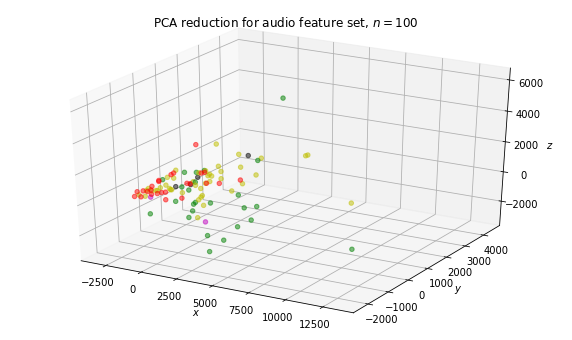

In [13]:
pca = PCA(n_components=3)
pca_data = pca.fit_transform(feature_space)

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')

genre_color_map = {
    38: 'b',
    15: 'g',
    12: 'r',
    1235: 'c',
    10: 'm',
    17: 'y',
    21: 'k',
    2: 'w' }

X=[]
Y=[]
Z=[]
colors=[]
for index, sample in enumerate(pca_data):
    # Add info to appropriate lists
    X.append(sample[0])
    Y.append(sample[1])
    Z.append(sample[2])
    gen = genre_of_sample[feature_space.index.values[index]]
    colors.append(genre_color_map[gen])

# Plot
ax.scatter(X,Y,Z, c=colors, alpha=0.5)
    
# Project plot onto each axis
# ax.scatter(X, Z, marker='>', c=colors, zdir='y')
# ax.scatter(Y, Z, marker='^', c=colors, zdir='x')
# ax.scatter(X, Y, marker='<', c=colors, zdir='z')
    
ax.set_title(f'PCA reduction for audio feature set, $n = {len(feature_space)}$')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$');

In [14]:
# Plot temporal information for echonest features [20:]
# x = feature_space.iloc[7]
# x.values
# plt.plot(x.values);

# Feature Selection using Variance Threshold
Remove features below a specified variance, with the goal being to keep only features with high variance

In [15]:
from sklearn.feature_selection import VarianceThreshold

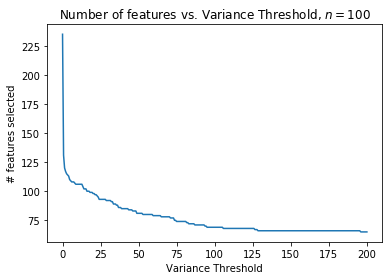

In [19]:
threshold = []
num_features = []
var_range = np.linspace(0, 200, 300)
for var in var_range:
    vt = VarianceThreshold(var)
    selected = vt.fit_transform(feature_space)
    num_features.append(len(selected[0]))
    threshold.append(var)
plt.plot(threshold, num_features)
plt.title(f'Number of features vs. Variance Threshold, $n = {len(feature_space)}$')
plt.xlabel('Variance Threshold')
plt.ylabel('# features selected');

# Bayesian Classifier
Written using code from homework assignments

# Classification

In [33]:
from sklearn.model_selection import KFold, train_test_split

In [37]:
train, test = train_test_split(feature_space, test_size=0.2, shuffle=True)

kf = KFold(n_splits=5, shuffle=False)
folds = kf.split(feature_space)
for fold in folds:
    train, test = fold
    print(train)

[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99]
[ 0  1  2  3  4  5  